In [1]:
import pandas as pd
import numpy as np
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression,Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('car_data_v2.csv')

In [3]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,mileage,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,19.70,46.30,5,120000
1,Maruti Alto,Maruti,Alto,9,37000,20.92,67.10,5,226000
2,Maruti Wagon R,Maruti,Wagon R,8,35000,18.90,67.10,5,350000
3,Maruti Wagon R,Maruti,Wagon R,3,17512,20.51,67.04,5,410000
4,Hyundai Venue,Hyundai,Venue,2,20000,18.15,118.35,5,1050000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_name       2119 non-null   object 
 1   brand          2119 non-null   object 
 2   model          2119 non-null   object 
 3   vehicle_age    2119 non-null   int64  
 4   km_driven      2119 non-null   int64  
 5   mileage        2119 non-null   float64
 6   max_power      2119 non-null   float64
 7   seats          2119 non-null   int64  
 8   selling_price  2119 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 149.1+ KB


In [5]:
df.describe()

,vehicle_age,km_driven,mileage,max_power,seats,selling_price
count,2119.000000,2119.000000,2119.000000,2119.000000,2119.000000,2.119000e+03
mean,6.153374,42207.621992,22.574856,61.802931,5.002832,3.287744e+05
std,3.524845,27950.561196,3.008683,13.112960,0.176503,1.496699e+05
min,0.000000,581.000000,14.400000,38.400000,4.000000,4.000000e+04
25%,4.000000,21000.000000,20.510000,53.260000,5.000000,2.490000e+05
50%,5.000000,38000.000000,22.740000,67.000000,5.000000,3.150000e+05
75%,8.000000,58494.000000,23.950000,67.050000,5.000000,3.900000e+05
max,29.000000,425785.000000,33.540000,123.370000,7.000000,1.240000e+06


In [6]:
df.isnull().sum()

car_name         0
brand            0
model            0
vehicle_age      0
km_driven        0
mileage          0
max_power        0
seats            0
selling_price    0
dtype: int64

In [7]:
df.shape

(2119, 9)

C:\Users\nilay\AppData\Local\Temp\ipykernel_9808\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

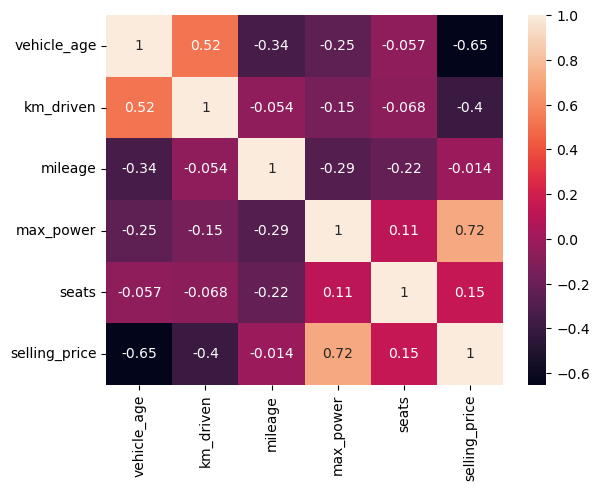

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
# Features and target
X = df[[ 'vehicle_age', 'max_power']]
#X=df.drop('selling_price',axis=1)
y = df['selling_price']
X

,vehicle_age,max_power
0,9,46.30
1,9,67.10
2,8,67.10
3,3,67.04
4,2,118.35
...,...,...
2114,6,67.04
2115,7,47.30
2116,4,67.00
2117,4,47.30


In [12]:
# create multiple linear regression model
model = LinearRegression()

In [13]:
# Perform K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=0)
cv_scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
cv_scores

array([0.740032  , 0.76962997, 0.77308338, 0.71361647, 0.74942979])

In [ ]:
#Task - implement KFold technique for ridge, lasso and elastic net